In [2]:
from SQLite_handler import *
from my_weapon import *
from tqdm import tqdm_notebook as tqdm
from datetime import datetime
%matplotlib inline
sns.set(style="darkgrid", font_scale=1.2)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
sess = get_session()

In [5]:
# d = sess.query(Weekly_Predict).filter(Weekly_Predict.dt > "2019-05-14").all()
d = sess.query(Weekly_Predict).filter(Weekly_Predict.dt).all()

In [6]:
dts = []
K = []
M = []

for t in d:
    dts.append(pendulum.instance(t.dt).add(days=-1).to_date_string())
    K.append(t.U_Cristina)
    M.append(t.U_Macri)
    
data = pd.DataFrame({"dt": dts, "K": K, "M": M}).set_index("dt")
data.index = pd.to_datetime(data.index)
# data

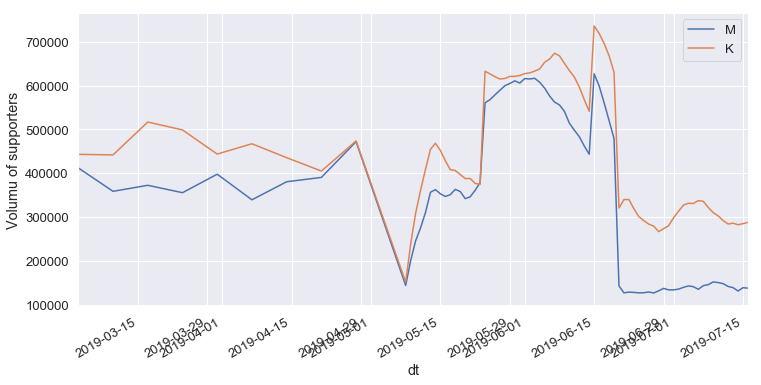

In [7]:
ax = plt.figure(figsize=(12, 6))
data["M"].plot()
data["K"].plot()
plt.ylabel("Volumu of supporters")
plt.legend()

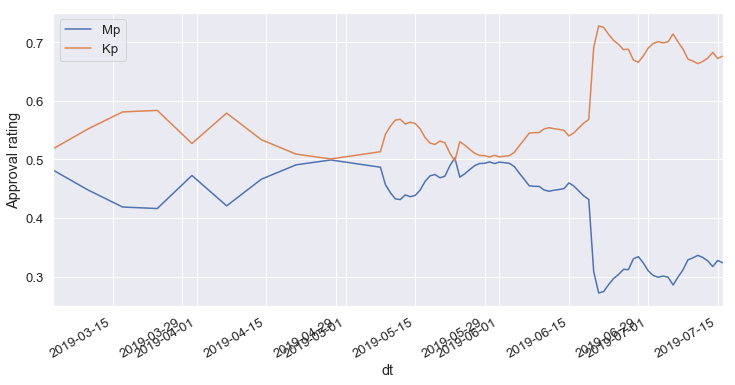

In [8]:
data["Kp"] = data["K"] / (data["K"] + data["M"])
data["Mp"] = data["M"] / (data["K"] + data["M"])

plt.figure(figsize=(12, 6))
data["Mp"].plot()
data["Kp"].plot()
plt.ylabel("Approval rating")
plt.legend()
plt.show()

In [9]:
d = sess.query(Stat).order_by("dt").all()

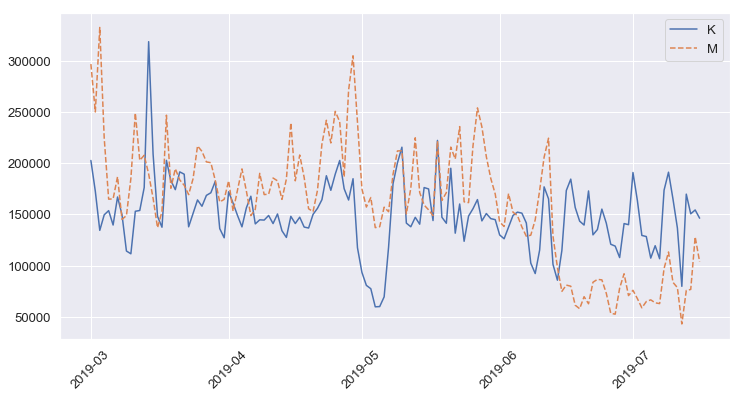

In [10]:
dts = []; K = []; M = []; R = []

for t in d:
    # dt = pendulum.instance(t.dt).add(days=-1)
    dts.append(t.dt)
    K.append(t.K_tweet_count)
    M.append(t.M_tweet_count)
    R.append(t.U_tweet_count)
#     print(dts[-1], K[-1], M[-1], R[-1])

plt.figure(figsize=(12, 6))
plt.plot_date(dts, K, "-", label="K")
plt.plot_date(dts, M, "--", label="M")
# plt.plot_date(dts, R, "--", label="R")
plt.xticks(rotation=45)
plt.legend()

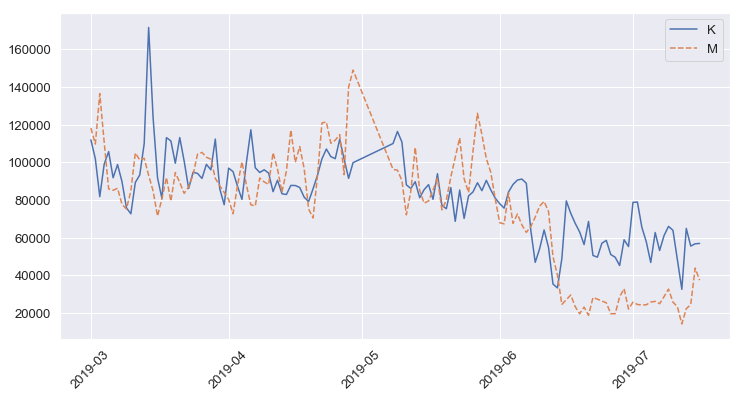

In [12]:
dts = []; K = []; M = []; R = []

for t in d:
    # dt = pendulum.instance(t.dt).add(days=-1)
    if t.dt < datetime(2019, 4, 30) or t.dt >= datetime(2019, 5, 8):
        dts.append(t.dt)
        K.append(t.K_user_count)
        M.append(t.M_user_count)
        R.append(t.I_user_count)
    # print(dts[-1], K[-1], M[-1], R[-1])
    
plt.figure(figsize=(12, 6))
plt.plot_date(dts, K, "-", label="K")
plt.plot_date(dts, M, "--", label="M")
# plt.plot_date(dts, R, "--", label="R")
plt.xticks(rotation=45)
plt.legend()

In [72]:
d = sess.query(NoPASO_Predict).filter(NoPASO_Predict.dt >= "2019-05-16").order_by("dt").all()

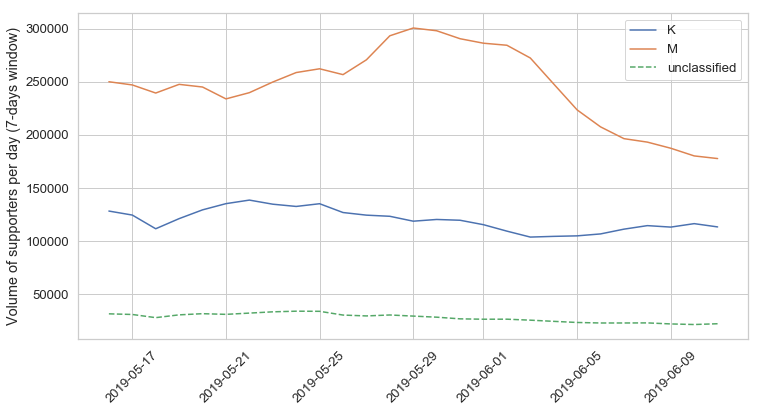

In [77]:
dts = []; K = []; M = []; R = []; U = []

for t in d:
    # dt = pendulum.instance(t.dt).add(days=-1)
    dts.append(t.dt)
    K.append(t.U_Cristina)
    M.append(t.U_Macri)
    U.append(t.U_unclassified)
    R.append(t.U_irrelevant)
#     print(dts[-1], K[-1], M[-1], U[-1])
    
plt.figure(figsize=(12, 6))
plt.plot_date(dts, K, "-", label="K")
plt.plot_date(dts, M, "-", label="M")
plt.plot_date(dts, U, "--", label="unclassified")
plt.xticks(rotation=45)
plt.ylabel("Volume of supporters per day (7-days window)")
plt.legend()

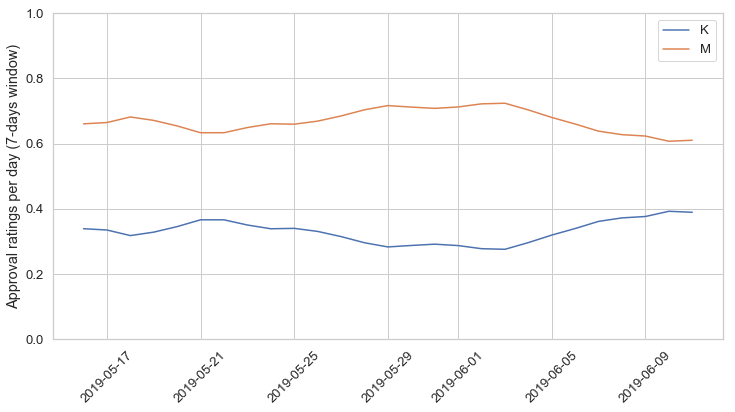

In [78]:
dts = []; K = []; M = []; R = []; U = []

for t in d:
    # dt = pendulum.instance(t.dt).add(days=-1)
    dts.append(t.dt)
    _sum = t.U_Cristina + t.U_Macri
    K.append(t.U_Cristina / _sum)
    M.append(t.U_Macri / _sum)
#     U.append(t.U_unclassified)
#     R.append(t.U_irrelevant)
#     print(dts[-1], K[-1], M[-1], U[-1])
    
plt.figure(figsize=(12, 6))
plt.plot_date(dts, K, "-", label="K")
plt.plot_date(dts, M, "-", label="M")
# plt.plot_date(dts, U, "--", label="unclassified")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.ylabel("Approval ratings per day (7-days window)")
plt.legend()